In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

In [8]:
data = pd.read_csv("winequality-red.csv")
x=data.drop('quality',axis=1)
y=data['quality']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=100)

y_pred:  [6 7 5 5 7 8 5 6 6 7 7 5 5 5 6 5 5 5 6 5 7 6 6 7 7 6 6 6 6 5 5 5 7 8 5 6 6
 5 5 5 5 5 6 6 7 7 5 6 6 6 6 5 5 5 6 6 7 6 5 5 7 6 6 7 6 5 6 5 5 5 5 6 6 7
 6 6 5 6 7 5 6 7 7 5 5 4 6 6 6 6 6 6 5 5 7 5 6 5 4 7 6 6 6 5 5 7 6 8 5 5 5
 6 7 5 6 6 5 6 6 4 5 6 6 7 6 5 6 5 5 5 6 6 5 5 6 6 7 6 5 7 6 5 5 7 5 5 7 5
 7 5 6 6 8 5 7 6 5 4 5 8 5 6 7 5 7 6 6 6 4 7 5 6 6 5 6 5 5 5 6 7 5 5 5 6 8
 5 6 5 8 5 7 5 5 6 5 5 5 6 6 5 7 6 6 5 6 6 6 3 6 6 5 7 5 5 6 5 5 5 6 6 5 6
 5 6 7 6 5 6 6 5 5 6 6 6 6 6 8 5 6 4 6 5 6 6 5 5 5 6 6 8 6 6 6 5 5 4 5 6 5
 5 6 5 6 6 5 6 5 5 7 7 5 7 6 7 5 6 7 6 5 6 5 6 6 5 5 5 6 6 5 5 7 5 6 5 6 5
 5 5 7 4 5 5 6 5 6 6 4 6 4 6 6 5 6 6 7 6 6 4 7 5 6 4 5 5 5 5 5 6 6 5 6 6 7
 7 5 6 5 6 5 5 6 6 6 7 6 5 5 5 5 5 5 6 7 6 5 6 5 6 5 7 5 5 8 5 5 6 5 6 6 5
 5 5 6 5 5 6 6 6 5 7 6 6 6 5 5 6 5 5 7 6 7 7 6 5 6 6 5 6 5 6]
y_test:  [5 6 5 6 7 7 6 6 6 7 7 5 5 5 6 5 5 5 6 5 6 6 6 8 6 6 5 4 6 5 5 5 7 5 5 6 6
 5 5 5 5 6 6 6 6 5 6 6 3 6 5 5 6 5 6 7 7 5 5 5 7 5 7 7 6 4 5 6 5 5 5 8 6 7
 6 6 5 6 6 5 4 5 7 6

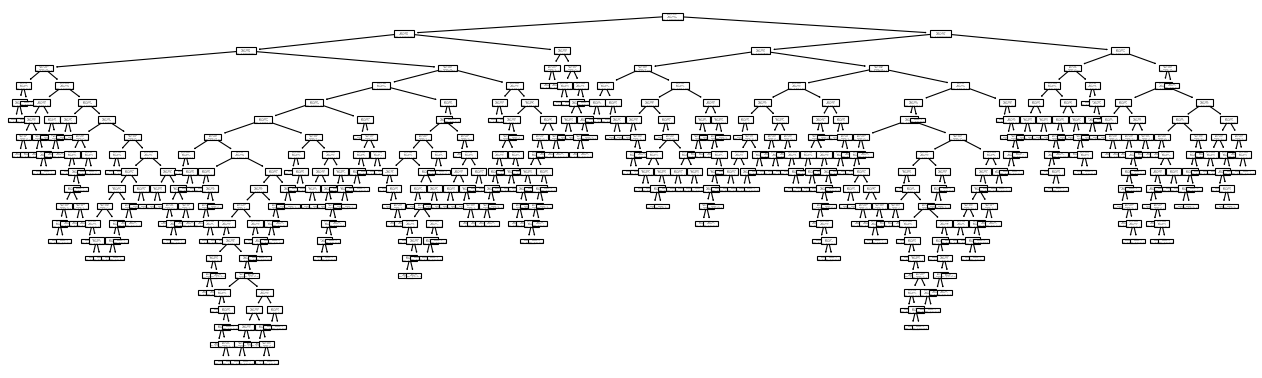

In [9]:
# Question 1
clf = DecisionTreeClassifier(criterion="gini",random_state=100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plot_tree(clf)
plt.savefig('tree.png')
print("y_pred: ", y_pred)
print("y_test: ",np.array(y_test))
print("y_test: ",y_test)

In [10]:
# Question 2
print("10 cross-validation score", np.mean(cross_val_score(clf, x, y, cv=10)))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1: ", f1_score(y_test, y_pred, average='macro'))

10 cross-validation score 0.4765526729559748
Accuracy:  0.59
Precision:  0.30562656214496703
Recall:  0.30735435714199283
F1:  0.3060659404785882


In [12]:
# Question 3 & 4
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.3,random_state=1)
model=LinearRegression()
model.fit(x2_train,y2_train)
y2_pred=model.predict(x2_test)
r_sq = model.score(x2_train, y2_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('predicted response:', y2_pred, sep='\n')
print("MSE: ", metrics.mean_squared_error(y2_test,y2_pred))

coefficient of determination: 0.3732759065142278
intercept: 36.546937447744504
slope: [ 4.58527906e-02 -1.17640321e+00 -2.87778222e-01  1.64922765e-02
 -1.80636202e+00  6.07141383e-03 -3.77903394e-03 -3.26155240e+01
 -3.75065394e-01  8.87110235e-01  2.67134606e-01]
predicted response:
[5.54096565 5.36989645 6.10505858 5.74193275 6.70446788 5.99284464
 6.21945794 5.06042533 5.76434777 5.16110692 6.20053845 5.3581788
 5.57545788 6.48751434 5.6342095  5.36206798 5.9692357  5.42284425
 5.61642209 5.42472535 5.76425606 6.19843286 5.38347544 6.44302873
 5.4465834  6.30871137 6.12437492 5.66115672 5.32571352 5.75947059
 5.26190019 6.39964188 5.21608271 6.3101122  4.91013636 5.74700718
 5.2994134  5.3763176  6.36843078 5.07493841 6.07589215 5.03970156
 5.22425778 6.17544669 5.11529364 5.79466462 5.10602686 5.26060517
 5.09219633 6.06257072 5.64917257 5.46669867 6.26296816 4.8129872
 5.09380039 5.99017093 6.07420349 5.96541377 5.84445539 5.24387716
 6.3150529  5.20743892 5.29521589 5.52980205 4